### Create folders with Monstera species images with Google API

In [1]:
# import requests
# import os
# from dotenv import load_dotenv

# # Load API keys
# load_dotenv()
# API_KEY = ""
# CX = os.getenv("GOOGLE_CX")

# print("GOOGLE_API_KEY:", API_KEY)  # Should print a key
# print("GOOGLE_CX:", CX)            # Should print a CX ID

# monstera_plant_species = [
#     # ("Monstera dubia plant", "monstera_dubia_images", "dubia"),
#     # ("Monstera siltepecana plant", "monstera_siltepecana_images", "siltepecana"),
#     # ("Monstera standleyana plant", "monstera_standleyana_images", "standleyana"),
#     # ("Monstera lechleriana plant", "monstera_lechleriana_images", "lechleriana"),
#     # ("Monstera acuminata plant", "monstera_acuminata_images", "acuminata"),
#     # ("Monstera pinnatipartita plant", "monstera_pinnatipartita_images", "pinnatipartita"),
#     # ("Monstera subpinnata plant", "monstera_subpinnata_images", "subpinnata"),
#     # ("Monstera karstenianum plant", "monstera_karstenianum_images", "karstenianum"),
#     # ("Monstera epipremnoides plant", "monstera_epipremnoides_images", "epipremnoides"),
#     # ("Monstera acacoyaguensis plant", "monstera_acacoyaguensis_images", "acacoyaguensis"),
#     # ("Monstera aureopinnata plant", "monstera_aureopinnata_images", "aureopinnata"),
#     # ("Monstera dissecta plant", "monstera_dissecta_images", "dissecta"),
#     # ("Monstera gambensis plant", "monstera_gambensis_images", "gambensis"),
#     # ("Monstera gracilis plant", "monstera_gracilis_images", "gracilis"),
#     # ("Monstera luteynii plant", "monstera_luteynii_images", "luteynii"),
#     # ("Monstera minima plant", "monstera_minima_images", "minima"),
#     # ("Monstera molinae plant", "monstera_molinae_images", "molinae"),
#     # ("Monstera peru plant (Monstera karstenianum)", "monstera_peru_images", "peru"),
#     # ("Monstera sp. Bolivia plant", "monstera_bolivia_images", "bolivia"),
#     # ("Monstera spruceana plant", "monstera_spruceana_images", "spruceana"),
#     # ("Monstera tenuis plant", "monstera_tenuis_images", "tenuis"),
#     # ("Monstera tuberculata plant", "monstera_tuberculata_images", "tuberculata"),
#     # ("Monstera xanthospatha plant", "monstera_xanthospatha_images", "xanthospatha")
# # ("Monstera esqueleto plant", "monstera_esqueleto_images", "esqueleto"),
# # ("Monstera aurea plant", "monstera_aurea_images", "aurea"),
# # ("Monstera thai constellation plant", "monstera_thai_constellation_images", "thai_constellation"),
# # ("Monstera variegata plant", "monstera_variegata_images", "variegata"),
# ]

# def download_images(query, folder_name, num_images_needed=200, images_per_request=10, image_prefix="monstera"):
#     '''Function to download images'''
#     os.makedirs(folder_name, exist_ok=True)

#     downloaded_images = []
#     for start in range(1, num_images_needed + 1, images_per_request):  # Start increments by 10
#         search_url = f"https://www.googleapis.com/customsearch/v1?q={query}&cx={CX}&searchType=image&num={images_per_request}&start={start}&key={API_KEY}"
#         print(f"🌿 Fetching images for: {query}")

#         response = requests.get(search_url).json()

#         # Debugging: Print response to check for errors
#         if "error" in response:
#             print(f"❌ API Error: {response['error']['message']}")
#             break

#         if "items" not in response:
#             print("⚠️ No more images found. Stopping pagination.")
#             break  # Stop if Google doesn't return images

#         images = [item["link"] for item in response["items"]]

#         # Download images
#         for i, img_url in enumerate(images):
#             try:
#                 img_data = requests.get(img_url).content
#                 file_path = os.path.join(folder_name, f"{image_prefix}_{len(downloaded_images) + i}.jpg")
#                 with open(file_path, "wb") as f:
#                     f.write(img_data)
#                 downloaded_images.append(file_path)
#             except Exception as e:
#                 print(f"❌ Error downloading {img_url}: {e}")

#         print(f"✅ Downloaded {len(downloaded_images)} images so far for {query}...")

#     print(f"🎉 Total images downloaded for {query}: {len(downloaded_images)}")

# # 🔹 Download images for all *Monstera* species
# for query, folder_name, image_prefix in monstera_plant_species:
#     download_images(query, os.path.join("data", folder_name), 200, 10, image_prefix)

### Check and remove duplicate images

In [2]:
# from PIL import Image, UnidentifiedImageError
# import imagehash
# import os

# directory = './data'
# duplicate_list = []
# hash_list = []

# for subfolder in os.listdir(directory):
#     subfolder_path = os.path.join(directory, subfolder)
#     if os.path.isdir(subfolder_path):  # Check if it's a directory
#         for image in os.listdir(subfolder_path):
#             image_path = os.path.join(subfolder_path, image)
#             try:
#                 # Try to open the image
#                 img = Image.open(image_path)
#                 hash_image = str(imagehash.dhash(img))
#                 if hash_image in hash_list:
#                     duplicate_list.append(image_path)
#                     print('Duplicate found at: ' + image_path)
#                     os.remove(image_path)  # Remove the duplicate
#                 else:
#                     hash_list.append(hash_image)
#             except UnidentifiedImageError:
#                 print(f"Unidentified image file, skipping: {image_path}")
#             except Exception as e:
#                 print(f"Error processing {image_path}: {e}")

# print("Duplicate files removed:", duplicate_list)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import cv2
import os
import shutil
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report

### Reading data

In [25]:
species = os.listdir('./data')
print(species)

['Anthurium', '.ipynb_checkpoints', 'Monstera', 'Pothos', 'Calathea', 'Alocasia']


In [26]:
species_images = {}

# List all entries in the main data directory and process only directories
for entry in os.listdir('./data'):
    path = f"./data/{entry}"
    if os.path.isdir(path):  # Check if the entry is a directory
        species_images[entry] = os.listdir(path)
    else:
        print(f"Skipped: {path} (not a directory)")

In [27]:
# Function to find and optionally delete invalid or missing images
def find_and_handle_invalid_images(data_directory, delete=False):
    """ 
    This function scans all image files in the specified directory and its subdirectories. It attempts to open each file using PIL to verify its integrity. 
    If an image is invalid (e.g., corrupted or unrecognized format), it is recorded. If `delete=True`, invalid images are also deleted from the filesystem.
    Args:
        data_directory (str): Path to directory containing images
        delete (bool, optional): If True, deletes invlaid images. Defaults to False.
    Returns:
        list: A list of file paths corresponding to invalid images.
    """
    invalid_images = []

    for root, dirs, files in os.walk(data_directory):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                # Attempt to open the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify image integrity
            except (FileNotFoundError, UnidentifiedImageError):
                invalid_images.append(image_path)
                print(f"Invalid image found: {image_path}")

                if delete:
                    try:
                        os.remove(image_path)
                        print(f"Deleted: {image_path}")
                    except Exception as e:
                        print(f"Error deleting {image_path}: {e}")

    if not invalid_images:
        print("No invalid images found.")
    else:
        print(f"Total invalid images found: {len(invalid_images)}")

    return invalid_images

# Function to convert all images to RGB format
def convert_images_to_rgb(data_directory):
    """
    This function scans all image files in the specified directory and its subdirectories.
    If an image is not in RGB format, it is converted and saved in-place.
    Args:
        data_directory: Path to directory containing images
    Returns:
        None
    """
    for root, dirs, files in os.walk(data_directory):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    # Convert to RGB if necessary
                    img = img.convert('RGB')
                    img.save(image_path)
            except Exception as e:
                print(f"Error converting {image_path} to RGB: {e}")

# Usage example
# Set the directory containing your dataset
DATA_DIRECTORY = './data'

# Find invalid images without deleting them
invalid_images = find_and_handle_invalid_images(DATA_DIRECTORY, delete=False)

# Uncomment the line below to delete invalid images after reviewing them
# find_and_handle_invalid_images(DATA_DIRECTORY, delete=True)

# Convert all valid images to RGB format
convert_images_to_rgb(DATA_DIRECTORY)


No invalid images found.


In [28]:
for specie in species_images:
    print(f"Dataset contains {len(species_images[specie])} images of {specie}")

Dataset contains 333 images of Anthurium
Dataset contains 0 images of .ipynb_checkpoints
Dataset contains 396 images of Monstera
Dataset contains 243 images of Pothos
Dataset contains 330 images of Calathea
Dataset contains 332 images of Alocasia


In [29]:
species_list = []
image_list = []

# Iterate through the dictionary
for species, images in species_images.items():
    for image in images:
        species_list.append(species)  # Append species name
        image_list.append(image)      # Append corresponding image

# Create the DataFrame
df = pd.DataFrame({
    "species": species_list,
    "image": image_list
})
print(df.head())

     species    image
0  Anthurium  398.jpg
1  Anthurium    2.jpg
2  Anthurium  172.jpg
3  Anthurium  178.jpg
4  Anthurium  146.jpg


Count the number of images in a folder

In [30]:
folder_name = "monstera_combined_script"
data_genera_path = f"./data/{folder_name}"
fileList=os.listdir(data_genera_path)
print(len(fileList))
# for checking whether file is not a directory
print(len([fname for fname in os.listdir(path) if os.path.isfile(os.path.join(path, fname))]))


FileNotFoundError: [Errno 2] No such file or directory: './data/monstera_combined_script'

Transfer images from monstera image folder to a combined folder

In [9]:
# # Source and destination directories
# source_dir = "./monstera_data"
# target_dir = "./data/monstera_combined_script"

# # Create the target directory if it doesn't exist
# os.makedirs(target_dir, exist_ok=True)

# # Iterate through each folder in the source directory
# for folder in os.listdir(source_dir):
#     folder_path = os.path.join(source_dir, folder)
#     if os.path.isdir(folder_path):  # Ensure it's a directory
#         # Get all image files in the folder
#         images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
#         # Take the first 36 images (or all if there are fewer)
#         for image in images[:36]:
#             source_image_path = os.path.join(folder_path, image)
#             target_image_path = os.path.join(target_dir, image)
            
#             # Copy the image to the target directory
#             shutil.copy(source_image_path, target_image_path)

# print("Images successfully moved to", target_dir)

### EDA

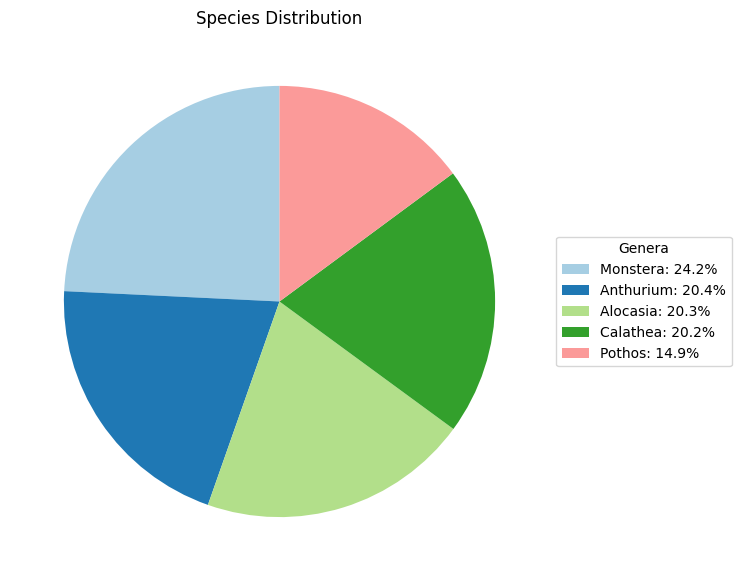

In [10]:
value_counts = df['species'].value_counts()

# Calculate the percentage for each category
percentages = 100 * value_counts / value_counts.sum()

# Plot pie chart without labels on the pie
plt.figure(figsize=(7, 7))
plt.pie(value_counts, startangle=90, colors=plt.cm.Paired.colors)

plt.title('Species Distribution')

# Create a separate table of labels with percentages
labels = [f'{species}: {percentage:.1f}%' for species, percentage in zip(value_counts.index, percentages)]

# Add the labels as a legend
plt.legend(labels, title="Genera", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

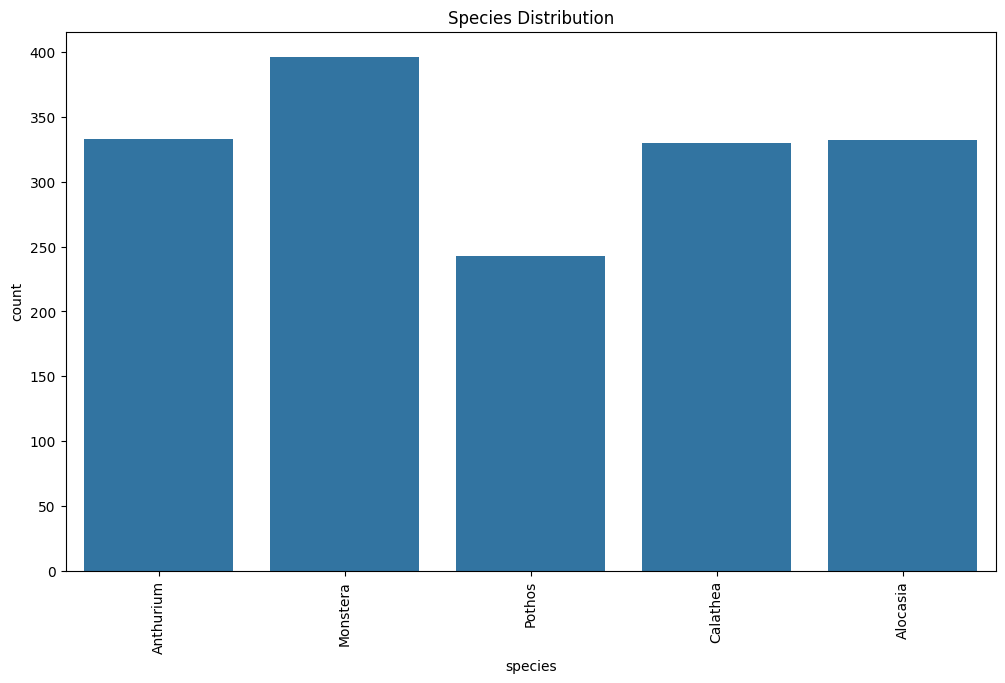

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(df, x='species')
plt.xticks(rotation=90)
plt.title("Species Distribution")
plt.show()

View the different images of plants

In [12]:

# for specie in species_images:
#     total_len = len(species_images[specie])
#     random_nos = np.random.randint(0, total_len, 5)
#
#
#     fig, axes = plt.subplots(1, 5, figsize=(12, 5))
#     fig.suptitle(f"{specie}", fontsize=16)
#
#
#     for i, no in enumerate(random_nos):
#         image_name = species_images[specie][no]
#         image = Image.open(f"./data/{specie}/{image_name}")
#         axes[i].imshow(image)
#         axes[i].axis('off')
#
#     plt.tight_layout()
#     plt.show()

### Building Image Generator, Preprocessing and Augmentation
Why do this?

- Easier Access to Images – Instead of manually constructing the path every time, storing it in a column makes it easy to load images later.
- Image Augmentation & Preprocessing – When working with a dataset of images, you'll often need file paths to load and transform the images.
- Training Readability – Many deep learning frameworks (like TensorFlow and PyTorch) require direct paths to images when creating datasets.

In [13]:
def create_image_path(row):
    """ Constructs the full file path for an image based on its species and filename.
    Args:
        row (pd.Series): A row from a Pandas DataFrame containing 'species' and 'image' columns.
    Returns:
        str: The full file path to the image. """
    species = row['species']
    image_name = row['image']
    path = "./data"
    return path + "/" + species + "/" + image_name

df["image_path"] = df.apply(create_image_path, axis=1)

In [14]:
from IPython.display import display

# Shuffle the dataframe to Avoid Bias in Training & Ensure Proper Data Splits
df = df.sample(frac=1).reset_index(drop=True)
print(display(df))

,species,image,image_path
0,Monstera,obliqua_154.jpg,./data/Monstera/obliqua_154.jpg
1,Monstera,monstera_190.jpg,./data/Monstera/monstera_190.jpg
2,Monstera,siltepecana_206.jpg,./data/Monstera/siltepecana_206.jpg
3,Calathea,1.jpg,./data/Calathea/1.jpg
4,Monstera,variegata_128.jpg,./data/Monstera/variegata_128.jpg
...,...,...,...
1629,Monstera,variegata_130.jpg,./data/Monstera/variegata_130.jpg
1630,Alocasia,215.jpg,./data/Alocasia/215.jpg
1631,Anthurium,105.jpg,./data/Anthurium/105.jpg
1632,Monstera,variegata_136.jpg,./data/Monstera/variegata_136.jpg


None


In [15]:
# Perform a train-test(validate) split, stratified by the species column. Validation set is used to evaluate models performance during training.
train_df, val_df = train_test_split(
    df,
    test_size=0.2,         # 20% validation set
    stratify=df['species'], # Stratify based on species to maintain the distribution for balanced learning
    random_state=42         # For reproducibility
)

In [16]:
# Parameters
image_size = (256, 256)
batch_size = 32

##### Images need to be preprocessed to ensure consistency. Must be resized to a uniform shape. ImageDataGenerator is used in Keras for augmentation making models more robust by applying random transformations. Images need to be loaded in batches with Generators to avoid memory consumption.

In [17]:
# ImageDataGenerator to augment images (eventually used for training) to prevent overfitting and increase data diversity
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,   # Rescale pixel values from [0-255] to [0-1] to improve model performance (normalization)
    rotation_range=20,   # Help model recognize images in different orientations
    width_shift_range=0.1,  # Shift horizontally by 10%
    height_shift_range=0.1, # Shift vertically by 10%
    shear_range=0.2,    # Apply shearing transformation (distorts image along an axis).
    zoom_range=0.2,     # Zoom into images randomly
    horizontal_flip=True, # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    fill_mode='nearest',  # Fill missing pixels after transformation by using nearest-neighbor interpolation
    channel_shift_range=20  # Randomly shift pixel values in each channel
)

# ImageDataGenerator for validation without augmentation because validation data should reprsent real-world images on unseen data
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Only rescale for validation
)

# Create the train dataset (with augmentations) from DataFrame. flow_from_dataframe() creates an efficient generator 
# for feeding images to the model batch by batch instead of everything in memory.
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',  # Column with image file paths
    y_col='species',     # Column with labels (species name)
    target_size=image_size,  # Resize images to 256x256 pixels (standard for models like EfficientNetV2L)
    batch_size=batch_size,   # Generator yields one batch at a time (until all images are processed) to save memory
    class_mode='categorical', # Multi-class classification (one-hot encoding)
    seed=42
)

# Create the validation dataset (without augmentations)
val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='species',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=42,
    shuffle = False   # Images are not shuffled, ensuring a fixed dataset for consistent evaluation.
)

Found 1296 validated image filenames belonging to 5 classes.
Found 326 validated image filenames belonging to 5 classes.


/home/basvgm/.pyenv/versions/3.11.10/envs/plantidtime/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 11 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/home/basvgm/.pyenv/versions/3.11.10/envs/plantidtime/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [18]:
print(train_generator.class_indices)

{'Alocasia': 0, 'Anthurium': 1, 'Calathea': 2, 'Monstera': 3, 'Pothos': 4}


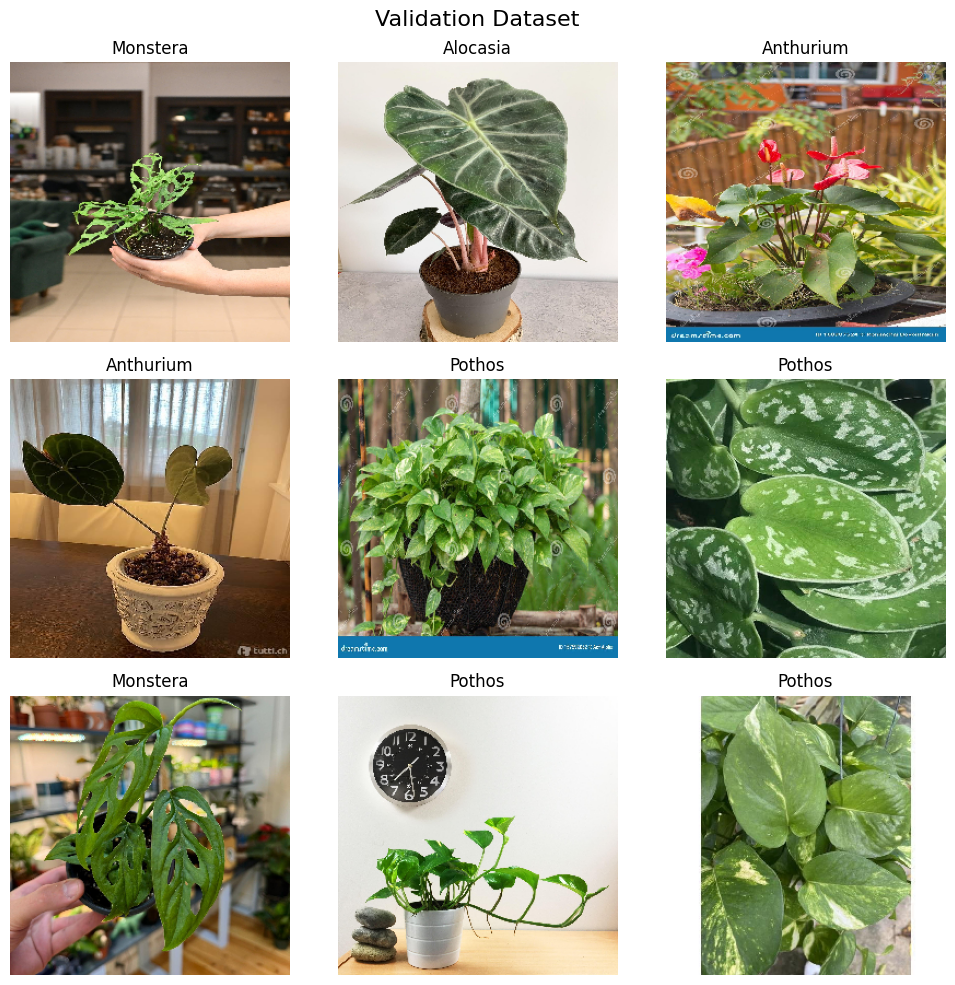

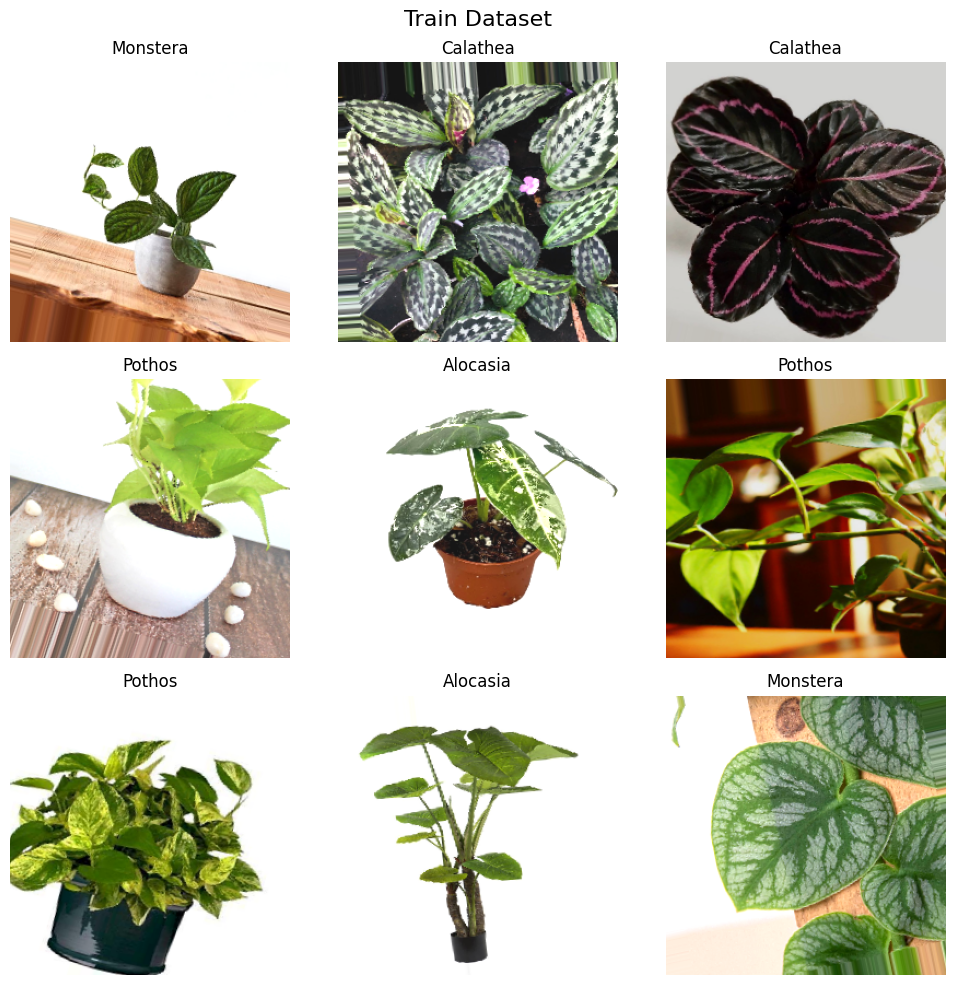

In [19]:
def visualize_augmented_images(generator, suptitle):
    """ Visualizes a batch of images generated by the `train_generator` or `val_generator`.
    This function retrieves a batch of augmented images from the specified generator,
    plots them in a 3x3 grid, and displays the corresponding class labels.
    Args:
        generator (keras.preprocessing.image.DataFrameIterator): 
            The data generator (either `train_generator` or `val_generator`) 
            used for loading images and labels.
        suptitle (str): 
            The title displayed above the plotted images.
    Returns:
        None: The function displays the images but does not return any value. """
    # Get a batch of images from the generator
    images, labels = next(generator)
    label_map = list(generator.class_indices.keys())

    # Create a 3x3 grid to display images
    plt.figure(figsize=(10, 10))
    plt.suptitle(suptitle, fontsize=16)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.title(label_map[np.argmax(labels[i])])
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_augmented_images(val_generator, "Validation Dataset")
visualize_augmented_images(train_generator, "Train Dataset")

### Building the Model
What Happens Internally?

By setting include_top=False, the model only keeps the convolutional layers:

✅ Keeps:

    Convolutional layers
    Batch normalization
    Max pooling
    Residual connections

❌ Removes:

    Fully connected (FC) layers (predictive layers)
    Softmax classifier

1. Load the base Model

In [20]:
from tensorflow.keras.applications import EfficientNetV2L as pretrained_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Convoluted Base MODEL as a feature extractor (convolutional based) for image classification.

conv_base = pretrained_model(weights='imagenet',   # Loads pretrained weights, dataset with millions of images already learned generic image features.
include_top=False,   # Remove fully connected layers. Want to classify species so add own classifier on top.
input_shape=(256, 256, 3))   # Model expects RGB. If your images aren’t already this size, Keras will automatically resize them when using ImageDataGenerator.

I0000 00:00:1739192441.320773    2245 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21458 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:09:00.0, compute capability: 8.9


2. Freeze base Model. Why?
Because base Model already knows useful things like how to see patterns. You only want to teach the top layers how to classify Monstera species. (Optional at this point)
3. Add own few extra layers at the top to make base Model recognize Monstera species.
    - Dense(128, activation="relu") – Adds a small "brain" layer with 128 neurons.
        - It learns which features are important for identifying Monstera species.
        - The relu part just helps it learn better by avoiding negative numbers.
    - Dense(len(train_generator.class_indices), activation="softmax") - – Adds the final layer to make predictions.
        - For example, if you have 5 Monstera species, it outputs 5 probabilities (e.g., "90% chance it's Monstera Deliciosa").
4. Compile the Model
    - Use the Adam optimizer, which is a smart way for the model to adjust itself.
    - Use categorical_crossentropy, which measures how wrong the model’s predictions are (for multi-class problems like this).

In [21]:
# 3. Add my own layers (Classifier Head)
headModel = conv_base.output   # Takes the feature maps from base model
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)  # Compress feature maps without extra parameters. Like compressing a big picture into just the important details.
headModel = Flatten(name="flatten")(headModel)   # Converts feature maps into a simple 1D array.
headModel = Dense(128, activation="relu")(headModel)   # Small fully connected layer (less risk of overfitting) for learning high-level features
headModel = Dropout(0.5)(headModel)   # Prevents overfitting by randomly disabling half the neurons.
predictions = Dense(len(train_generator.class_indices), activation="softmax")(headModel)  # Output layer

model = Model(inputs=conv_base.input, outputs=predictions)

# 4.  Compile the Model
model.compile(optimizer=Adam(learning_rate=1e-3),  # Small LR for stable training and better fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(model.summary())

### Model Training

In [24]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop training early if val_loss does not improve
    ModelCheckpoint(filepath='models/saved_model_freeze.keras', monitor='val_loss', save_best_only=True),  # Save the best model
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)  # Reduce learning rate when val_loss plateaus
]

In [25]:
# Initial training phase. Train ONLY the classifier head (Feature Extraction Phase)
history = model.fit(
    train_generator,    # Training data (augmented images)
    epochs=40,          # Number of training cycles (full passes over the dataset)
    validation_data=val_generator,  # Validation data (rescaled images, no augmentation)
    callbacks=callbacks  # Functions to adjust training dynamically (early stopping, model checkpointing, etc.)
)

# Fine-tuning phase: Unfreeze top layers
conv_base.trainable = True
for layer in conv_base.layers[:-100]:  # Freeze all but the last 100 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-4),  # Optionally reduce LR here
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training with fine-tuning
fine_tune_history = model.fit(
    train_generator,
    epochs=80,
    validation_data=val_generator,
    callbacks=callbacks  # Reuse the same callbacks
)


/home/basvgm/.pyenv/versions/3.11.10/envs/plantidtime/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1738938798.887714   11711 service.cc:148] XLA service 0x7f5200002040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738938798.887751   11711 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-02-07 15:33:21.663876: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738938810.211855   11711 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-07 15:33:46.562286: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87854', 16 bytes spill stores, 16 bytes spill loads

2025-02-07 15:33:46.679102: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87854_0', 112 

31/41 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.4613 - loss: 1.3408 

2025-02-07 15:35:15.059440: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87854', 16 bytes spill stores, 16 bytes spill loads

2025-02-07 15:35:15.239498: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_87854_0', 344 bytes spill stores, 520 bytes spill loads

2025-02-07 15:35:15.396387: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_93421', 24 bytes spill stores, 24 bytes spill loads

2025-02-07 15:35:15.416914: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_93421', 24 bytes spill stores, 28 bytes spill loads

E0000 00:00:1738938921.000147   11709 gpu_timer.cc:8

41/41 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.4931 - loss: 1.2928 - val_accuracy: 0.3262 - val_loss: 1.8532 - learning_rate: 0.0010
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 459ms/step - accuracy: 0.7482 - loss: 0.7969 - val_accuracy: 0.2031 - val_loss: 2.1081 - learning_rate: 0.0010
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 473ms/step - accuracy: 0.7931 - loss: 0.6311 - val_accuracy: 0.2431 - val_loss: 2.5611 - learning_rate: 0.0010
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 457ms/step - accuracy: 0.8134 - loss: 0.5745 - val_accuracy: 0.2431 - val_loss: 2.3058 - learning_rate: 0.0010
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 589ms/step - accuracy: 0.8866 - loss: 0.3824 - val_accuracy: 0.7877 - val_loss: 0.6742 - learning_rate: 1.0000e-04
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 587ms/step - accuracy: 0.9315 - loss: 0.2352 - val_accuracy: 0.8523 - val_loss: 0.4329 - learning_rate: 1.0000e-04
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - accuracy: 0.9331 - loss: 0.2033 

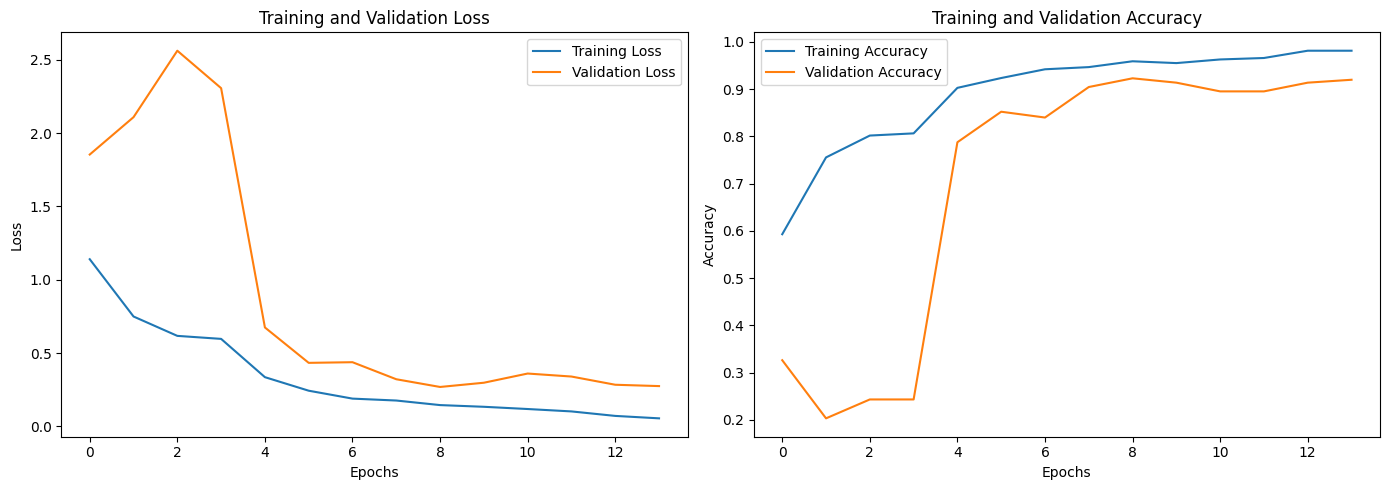

In [26]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluating the Model

In [27]:
model_path = ''
# model = tf.keras.models.load_model(model_path)

In [28]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_generator)

# Print the evaluation results
# This will return the loss and any metrics defined in the model
print(f"Loss: {evaluation[0]}")
for i, metric in enumerate(model.metrics_names[1:]):  # Skip the loss, already printed
    print(f"{metric}: {evaluation[i+1]}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9082 - loss: 0.3148
Loss: 0.2929236888885498
compile_metrics: 0.9169231057167053


11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step  


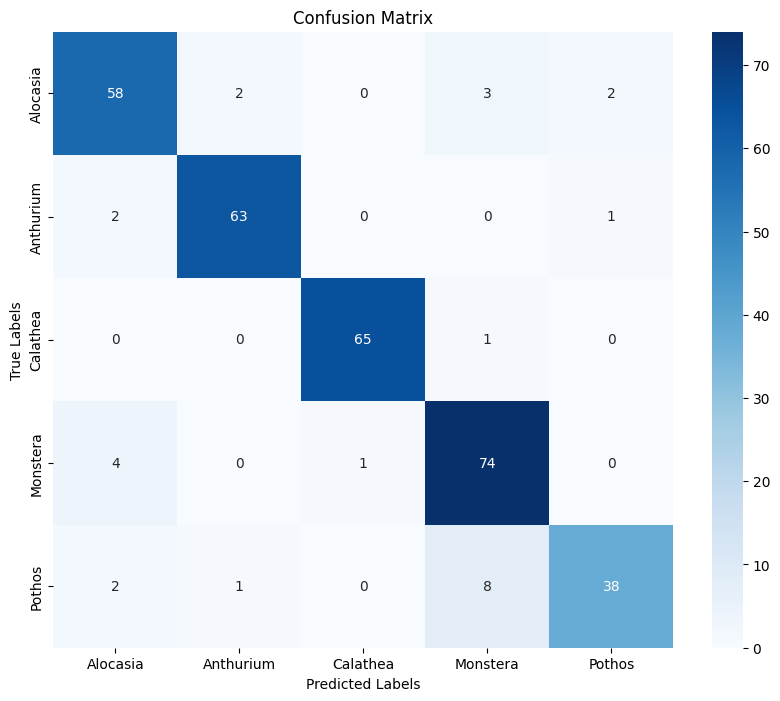

Classification Report:
              precision    recall  f1-score   support

    Alocasia       0.88      0.89      0.89        65
   Anthurium       0.95      0.95      0.95        66
    Calathea       0.98      0.98      0.98        66
    Monstera       0.86      0.94      0.90        79
      Pothos       0.93      0.78      0.84        49

    accuracy                           0.92       325
   macro avg       0.92      0.91      0.91       325
weighted avg       0.92      0.92      0.92       325



In [29]:
# 1. Generate predictions from the model
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Extract true labels from val_generator
true_classes = val_generator.classes  # This works if you're using ImageDataGenerator
class_labels = list(val_generator.class_indices.keys())  # Get the class labels

# 3. Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# 4. Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)